# Problem Description : Classification of Fraudulent Transactions

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten,Input
from keras import backend as K
from keras.models import Model, load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from scipy.spatial import distance
from sklearn.decomposition import PCA
from numpy import linalg as LA
from keras.objectives import categorical_crossentropy
from sklearn.metrics import roc_curve, auc
import math
from scipy.stats import pearsonr
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import csv
from sklearn import metrics
import tensorflow as tf
import tensorflow.contrib.layers as tl
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
%matplotlib inline


/home/ramchalamkr/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Part 1 : Supervised Learning Approaches

# Steps

## 1. Checking the Data

In [2]:
X = pd.read_csv('fraud_prep.csv',delimiter=',')
print X.shape
X.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


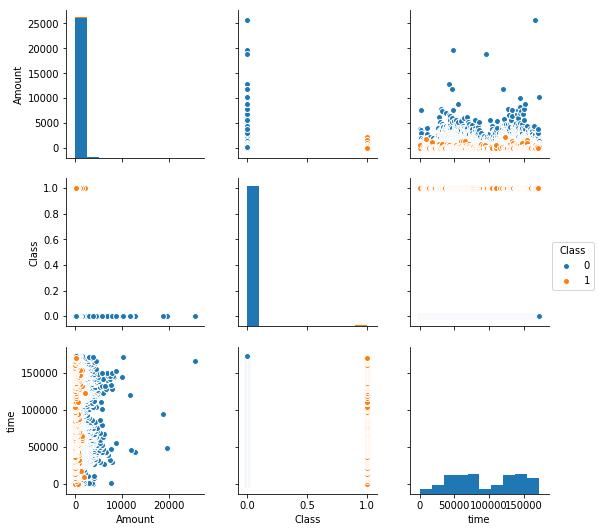

In [3]:
temp = pd.DataFrame({'Amount':X['Amount'],'time':X['Time'], 'Class':X['Class']})
sb.pairplot(temp.dropna(), hue='Class')

### Supervised Methods

In [3]:
Y = X['Class']
del X['Class']
print X.shape
print Y.shape

(284807, 30)
(284807,)


#### As can be seen, across time, not much distinction in data, but mostly in terms of amount. So can drop time

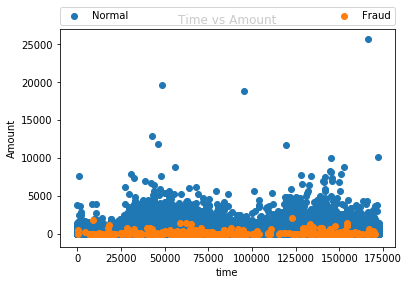

In [4]:
time = pd.DataFrame({'Amount':X['Amount'],'time':X['Time'], 'class':Y})
Normaltime = time[(time['class'] == 0)]
FraudTran = time[(time['class'] == 1)]
plt.scatter(Normaltime['time'], Normaltime['Amount'],label ="Normal")
plt.scatter(FraudTran['time'],FraudTran['Amount'],label ="Fraud")
plt.title("Time vs Amount")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("time")
plt.ylabel("Amount")
plt.show()

## 2. Tidying the Data

In [5]:
#Removing mean and scaling to unit variance
X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))
#removing the time column
del X['Time']

### Logistic Regression (Baseline Model)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
clf = linear_model.LogisticRegression()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
print "Accuracy",metrics.accuracy_score(Y_test, Y_pred)
print "AUC Value", metrics.roc_auc_score(Y_test, probs[:, 1])
print "Confusion Matrix"
print metrics.confusion_matrix(Y_test, Y_pred)
print "Precision Recall"
print metrics.classification_report(Y_test, Y_pred)

Accuracy 0.9992626663389628
AUC Value 0.9806636963106952
Confusion Matrix
[[85295    12]
 [   51    85]]
Precision Recall
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.88      0.62      0.73       136

avg / total       1.00      1.00      1.00     85443



In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
clf = RandomForestClassifier(max_depth=20)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
print "Accuracy",metrics.accuracy_score(Y_test, Y_pred)
print "AUC Value", metrics.roc_auc_score(Y_test, probs[:, 1])
print "Confusion Matrix"
print metrics.confusion_matrix(Y_test, Y_pred)
print "Precision Recall"
print metrics.classification_report(Y_test, Y_pred)

Accuracy 0.9995669627705019
AUC Value 0.9526959807449773
Confusion Matrix
[[85299     8]
 [   29   107]]
Precision Recall
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.93      0.79      0.85       136

avg / total       1.00      1.00      1.00     85443



### PCA

(284807, 29)


/home/ramchalamkr/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


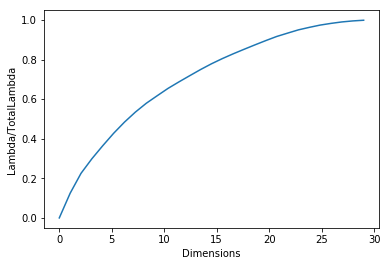

In [8]:
print X.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

Covariance = np.dot(X_train.T,X_train)

Lambda, e = LA.eigh(Covariance)
Lambda = Lambda.reshape(Lambda.shape[0],1)
Lambda = sorted(Lambda,reverse=True)
TotalLambda = np.sum(Lambda)
LambdaProp = []
for i in range(X_train.shape[1]):
    temp = np.sum(Lambda[0:i])*1.0/TotalLambda
    LambdaProp.append(temp)

Dim = np.linspace(0, X_train.shape[1], X_train.shape[1])

plt.plot(Dim,LambdaProp)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Dimensions')
plt.ylabel('Lambda/TotalLambda')
plt.show()

### This means there is no point in doing PCA as the total variance is represented by mostly all 28~30 features. It could also mean that the data already contains the best features and all are posibly required to get best results.

## 3. Model Development and Performance

### Feed Forwad Neural Networks 
### (Model Architecture followed an extension of a published paper.https://pdfs.semanticscholar.org/0419/c275f05841d87ab9a4c9767a4f997b61a50e.pdf)

### using original data

In [41]:
Y = np.reshape(Y,[Y.shape[0],1])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
K.clear_session()
InputWidth = X_train.shape[1]
model = Sequential()
model.add(Dense(256, input_shape = (InputWidth,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print model.summary()
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
op = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=100, verbose=2).history
#output = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=16, verbose=2,class_weight=class_weight).history
y_pred = model.predict(X_test)
y_pred = [int(item) for sublist in y_pred for item in sublist]
#print y_pred.shape
print "Accuracy",metrics.accuracy_score(Y_test, y_pred)
#print np.mean(y_pred==Y_test)
print metrics.confusion_matrix(Y_test, y_pred)
print metrics.classification_report(Y_test, y_pred)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

/home/ramchalamkr/.local/lib/python2.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


### DownSampling for imbalanced class 

In [47]:
#Downsampling the data to handle imbalance class.
X = pd.read_csv('fraud_prep.csv',delimiter=',')
fraud = X[X.Class ==1]
normal = X[X.Class==0]
#fraud.head()
frames = [fraud, normal[0:1000]]

DownSample = pd.concat(frames)
DownSample.head()
Y = DownSample['Class']
del DownSample['Class']
print DownSample.shape
print Y.shape
del DownSample['Time']
#Removing mean and scaling to unit variance
DownSample['Amount'] = StandardScaler().fit_transform(DownSample['Amount'].values.reshape(-1, 1))


(1492, 30)
(1492,)


#### Only keras

In [48]:
Y = np.reshape(Y,[Y.shape[0],1])
class_weight = {0: 1.,1: 50.}
X_train,X_test,Y_train,Y_test = train_test_split(DownSample,Y,test_size = 0.3,random_state=42)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
K.clear_session()
InputWidth = X_train.shape[1]
model = Sequential()
model.add(Dense(256, input_shape = (InputWidth,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print model.summary()
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#output = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=16, verbose=2).history
output = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=100, verbose=2,class_weight=class_weight).history
y_pred = model.predict(X_test)
y_pred = [int(item) for sublist in y_pred for item in sublist]
#print y_pred.shape
print "accuracy", metrics.accuracy_score(Y_test, y_pred)
print metrics.confusion_matrix(Y_test, y_pred)
print metrics.classification_report(Y_test, y_pred)
print "predicting on whole dataset"
Y = X['Class']
del X['Class']
print X.shape
print Y.shape
del X['Time']
#Removing mean and scaling to unit variance
X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))
X1 = np.asarray(X)
y_pred = model.predict(X1)
y_pred = [int(item) for sublist in y_pred for item in sublist]
#print y_pred.shape
print "accuracy", metrics.accuracy_score(Y, y_pred)
print metrics.confusion_matrix(Y, y_pred)
print metrics.classification_report(Y, y_pred)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

### No Downsampling but provide weights for the clases based on the imbalance

In [51]:
Y = np.reshape(Y,[Y.shape[0],1])
class_weight = {0: 1.,1: 50.}
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
K.clear_session()
InputWidth = X_train.shape[1]
model = Sequential()
model.add(Dense(256, input_shape = (InputWidth,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
print model.summary()
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
output = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=96, verbose=2,class_weight=class_weight).history
y_pred = model.predict(X_test)
y_pred = [int(item) for sublist in y_pred for item in sublist]
#print y_pred.shape
print "Test accuracy", metrics.accuracy_score(Y_test, y_pred)
print metrics.confusion_matrix(Y_test, y_pred)
print metrics.classification_report(Y_test, y_pred)

y_pred = model.predict(X_train)
y_pred = [int(item) for sublist in y_pred for item in sublist]
#print y_pred.shape
print "Train accuracy", metrics.accuracy_score(Y_train, y_pred)
print metrics.confusion_matrix(Y_train, y_pred)
print metrics.classification_report(Y_train, y_pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

#### Tensorflow + keras

In [52]:
Y = np.reshape(Y,[Y.shape[0],1])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=42)
tf.logging.set_verbosity(tf.logging.INFO)
sess = tf.Session()
K.set_session(sess)

InputWidth = X_train.shape[1]
OutputWidth = 1
#print Input[0:2]
#print Label[0:2]
inp = tf.placeholder(tf.float32, shape=(None,InputWidth))
out = tf.placeholder(tf.float32, shape=(None,OutputWidth))
print(out.get_shape())
print(inp.get_shape())
predictions=[]
predictionsTrain =[]
#OutputWidth = len(y_train[0])
learning_rate = 0.0001
#inplayer = Input(shape=(InputWidth, ))
x = Dense(512,activation='relu')(inp)
print(x)
x = Dense(256,activation='relu')(x)
print(x)
x = Dense(128,activation='relu')(x)
print(x)
#x = K.reshape(x,(len(X_train)*InputWidth,5))
#print x
x = Dense(32,activation='relu')(x)
print(x)
x = Dense(16,activation='relu')(x)
print(x)
preds = Dense(OutputWidth, activation='sigmoid')(x)
print(preds)

loss = tf.reduce_mean(categorical_crossentropy(out, preds))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
#acc_value = accuracy(out, preds)
with sess.as_default():
    sess.run(tf.global_variables_initializer())
    for epoch in range(20):
        print("epoch " + str(epoch))
    #train_step.run(feed_dict={inp:X_train,out:y_train,K.learning_phase(): 1})
        for i in range(1000):
            if(i%1000==0):
                print("iteration number"+str(i))
            _, loss_val = sess.run([train_step, loss],
                           feed_dict={inp:X_train[i*180:(i+1)*180],out:Y_train[i*180:(i+1)*180]})
        print "loss", loss_val
            #train_step.run(feed_dict={inp:X_train[i*180:(i+1)*180],out:X_train[i*180:(i+1)*180],K.learning_phase(): 1})
        #temp=acc_value.eval(feed_dict={inp: X_train,out: y_train})
        #print type(temp)
        #print temp
        #save_path = saver.save(sess, "model_512_5neighbours_ExtraDense.ckpt")
        print(out.get_shape())
        print(preds.get_shape())
        #print preds.eval(feed_dict={inp:X_train[0:2],out: y_train[0:2]})
        #p = tf.argmax(preds, axis=1)
    predictions = preds.eval(feed_dict={inp: X_test})
    predictionsTrain = preds.eval(feed_dict={inp: X_train})
    predictions = [int(item) for sublist in predictions for item in sublist]
    predictionsTrain = [int(item) for sublist in predictionsTrain for item in sublist]
    #print predictions.shape
    print Y_test.shape
    print np.mean(predictions==Y_test)
    print "Train accuracy"
    print metrics.confusion_matrix(Y_train, predictionsTrain)
    print metrics.classification_report(Y_train, predictionsTrain)
    print "test accuracy"
    print metrics.confusion_matrix(Y_test, predictions)
    print metrics.classification_report(Y_test, predictions)
    #print(len(predictions))
    #print(len(predictionsTrain))
   

(?, 1)
(?, 29)
Tensor("dense_6/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dense_7/Relu:0", shape=(?, 256), dtype=float32)
Tensor("dense_8/Relu:0", shape=(?, 128), dtype=float32)
Tensor("dense_9/Relu:0", shape=(?, 32), dtype=float32)
Tensor("dense_10/Relu:0", shape=(?, 16), dtype=float32)
Tensor("dense_11/Sigmoid:0", shape=(?, 1), dtype=float32)
epoch 0
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 1
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 2
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 3
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 4
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 5
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 6
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 7
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 8
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 9
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 10
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 11
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 12
iteration number0
loss 0.0
(?, 1)
(?, 1)
epoch 13

/home/ramchalamkr/.local/lib/python2.7/site-packages/ipykernel_launcher.py:64: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


             precision    recall  f1-score   support

          0       1.00      1.00      1.00    190477
          1       0.00      0.00      0.00       343

avg / total       1.00      1.00      1.00    190820

test accuracy
[[93838     0]
 [  149     0]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93838
          1       0.00      0.00      0.00       149

avg / total       1.00      1.00      1.00     93987



# Part 2 : Unsupervised Learning approach using Autoencoders

# Steps

## 1. Checking and Tidying Data

In [9]:
X = pd.read_csv('fraud_prep.csv',delimiter=',')
print X.shape
print Y.shape
del X['Time']
#Removing mean and scaling to unit variance
X['Amount'] = StandardScaler().fit_transform(X['Amount'].values.reshape(-1, 1))

(284807, 31)
(284807,)


0    284315
1       492
Name: Class, dtype: int64


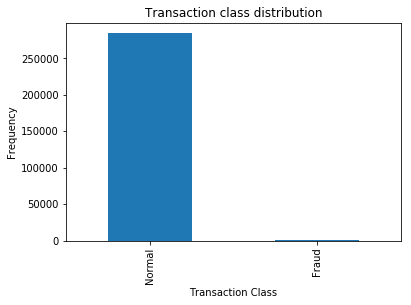

In [10]:
count_classes = pd.value_counts(X['Class'], sort = True)
print count_classes
count_classes.plot(kind = 'bar')
plt.title("Transaction class distribution")
plt.xticks(range(2), ['Normal','Fraud'])
plt.xlabel("Transaction Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
fraud = X[X.Class ==1]
normal = X[X.Class ==0]

In [12]:
fraud.Amount.describe()

count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [13]:
normal.Amount.describe()

count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64

In [14]:
X_train,X_test = train_test_split(X,test_size = 0.3,random_state=42)
X_train = X_train[X_train.Class==0]
del X_train['Class']
y_test = X_test['Class']
del X_test['Class']
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
print X_train.shape
print X_test.shape
print y_test.shape
#print X_train.head()


(199008, 29)
(85443, 29)
(85443,)


## 2. Model Development

### Build Model Pure tensorflow

In [ ]:
inputs = tf.placeholder(tf.float32, shape=(None, X.shape[1]))
out = X.shape[1]
def buildmodel(inp):
    e1 = tl.fully_connected(inp, 32, activation_fn=tf.nn.softplus)
    e2 = tl.fully_connected(e1, 16, activation_fn=tf.nn.softplus)
    e3 = tl.fully_connected(e2, 8, activation_fn=tf.nn.softplus)
    d1 = tl.fully_connected(e3, 8, activation_fn=tf.nn.softplus)
    d2 = tl.fully_connected(d1, 16, activation_fn=tf.nn.softplus)
    d3 = tl.fully_connected(d2, out, activation_fn=tf.nn.softplus)
    return out

outputs = buildmodel(inputs)
loss = tf.reduce_mean(tf.square(outputs - inputs))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
#init = tf.global_variables_initializer()

### Keras + Tensorflow

In [60]:
tf.logging.set_verbosity(tf.logging.INFO)
sess = tf.Session()
K.set_session(sess)

InputWidth = X_train.shape[1]
#print Input[0:2]
#print Label[0:2]
inp = tf.placeholder(tf.float32, shape=(None,InputWidth))
out = tf.placeholder(tf.float32, shape=(None,InputWidth))
print(out.get_shape())
print(inp.get_shape())
predictions=[]
predictionsTrain =[]
#OutputWidth = len(y_train[0])
learning_rate = 0.001
#inplayer = Input(shape=(InputWidth, ))
x = Dense(64,activation='relu')(inp)
print(x)
x = Dense(32,activation='relu')(x)
print(x)
x = Dense(16,activation='relu')(x)
print(x)
#x = K.reshape(x,(len(X_train)*InputWidth,5))
#print x
x = Dense(16,activation='relu')(x)
print(x)
x = Dense(32,activation='relu')(x)
print(x)
x = Dense(64,activation='relu')(x)
print(x)
preds = Dense(InputWidth, activation='relu')(x)
print(preds)

loss = tf.reduce_mean(tf.square(preds - inp))
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
#acc_value = accuracy(out, preds)
with sess.as_default():
    sess.run(tf.global_variables_initializer())
    for epoch in range(20):
        print("epoch " + str(epoch))
    #train_step.run(feed_dict={inp:X_train,out:y_train,K.learning_phase(): 1})
        for i in range(1000):
            if(i%1000==0):
                print("iteration number"+str(i))
            _, loss_val = sess.run([train_step, loss],
                           feed_dict={inp:X_train[i*180:(i+1)*180],out:X_train[i*180:(i+1)*180]})
        print "loss", loss_val
            #train_step.run(feed_dict={inp:X_train[i*180:(i+1)*180],out:X_train[i*180:(i+1)*180],K.learning_phase(): 1})
        #temp=acc_value.eval(feed_dict={inp: X_train,out: y_train})
        #print type(temp)
        #print temp
        #save_path = saver.save(sess, "model_512_5neighbours_ExtraDense.ckpt")
        print(out.get_shape())
        print(preds.get_shape())
        #print preds.eval(feed_dict={inp:X_train[0:2],out: y_train[0:2]})
        #p = tf.argmax(preds, axis=1)
    predictions = preds.eval(feed_dict={inp: X_test})
    print predictions.shape
    mse = np.mean(np.power(X_test - predictions, 2))
    print "test mse",mse
    predictions = preds.eval(feed_dict={inp: X_train})
    mse = np.mean(np.power(X_train - predictions, 2))
    print "train mse",mse
    print(len(predictions))
    print(len(predictionsTrain))
   

(?, 29)
(?, 29)
Tensor("dense_18/Relu:0", shape=(?, 64), dtype=float32)
Tensor("dense_19/Relu:0", shape=(?, 32), dtype=float32)
Tensor("dense_20/Relu:0", shape=(?, 16), dtype=float32)
Tensor("dense_21/Relu:0", shape=(?, 16), dtype=float32)
Tensor("dense_22/Relu:0", shape=(?, 32), dtype=float32)
Tensor("dense_23/Relu:0", shape=(?, 29), dtype=float32)
epoch 0
iteration number0
loss 0.43287447
(?, 29)
(?, 29)
epoch 1
iteration number0
loss 0.40982887
(?, 29)
(?, 29)
epoch 2
iteration number0
loss 0.39938778
(?, 29)
(?, 29)
epoch 3
iteration number0
loss 0.3843758
(?, 29)
(?, 29)
epoch 4
iteration number0
loss 0.37673163
(?, 29)
(?, 29)
epoch 5
iteration number0
loss 0.3734822
(?, 29)
(?, 29)
epoch 6
iteration number0
loss 0.37235656
(?, 29)
(?, 29)
epoch 7
iteration number0
loss 0.37125868
(?, 29)
(?, 29)
epoch 8
iteration number0
loss 0.3702827
(?, 29)
(?, 29)
epoch 9
iteration number0
loss 0.3692525
(?, 29)
(?, 29)
epoch 10
iteration number0
loss 0.36820066
(?, 29)
(?, 29)
epoch 11
iter

### Pure Keras

In [18]:
InputWidth = X_train.shape[1]
K.clear_session()
model = Sequential()
model.add(Dense(64, input_shape = (InputWidth,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(InputWidth, activation='relu'))
print model.summary()
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
op = model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=30, batch_size=64, verbose=2).history


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1920      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 29)                1885      
Total para

## 3. Model Performance

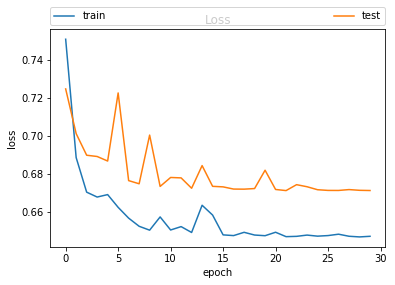

In [19]:
plt.plot(op['loss'],label ='train')
plt.plot(op['val_loss'],label ='test')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [20]:
y_pred = model.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)
print mse[0]

74.21776969533447


In [21]:
reconstLoss = pd.DataFrame({'ActualClass':y_test, 'mse':mse})
NormalTran = reconstLoss[(reconstLoss['ActualClass'] == 0) & (reconstLoss['mse']<5)]
FraudTran = reconstLoss[(reconstLoss['ActualClass'] == 1)]

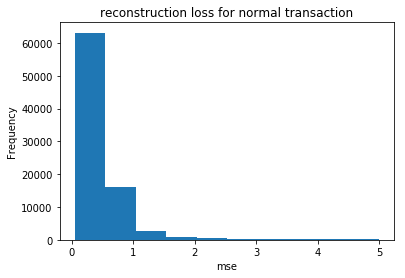

In [22]:
plt.hist(NormalTran['mse'],bins=10)
plt.title("reconstruction loss for normal transaction")
plt.xlabel("mse")
plt.ylabel("Frequency")
plt.show()

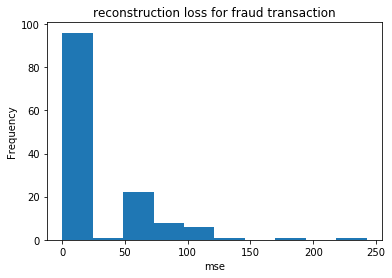

In [23]:
plt.hist(FraudTran['mse'],bins=10)
plt.title("reconstruction loss for fraud transaction")
plt.xlabel("mse")
plt.ylabel("Frequency")
plt.show()

In [24]:
def TN_TP(ytrue,ypred,l,tpe):
    count = 0
    for i in range(l):
        if(ytrue[i] == tpe and ypred[i] == tpe):
            count+=1
    return count

def FN_FP(ytrue,ypred,l,tpe):
    count = 0
    for i in range(l):
        if(ytrue[i] == tpe and ypred[i] != tpe):
            count+=1
    return count

def calculate_TPR_FPR(ytrue,ypred,P):
    TP = TN_TP(ytrue,ypred,len(P),1)
    TN = TN_TP(ytrue,ypred,len(P),0)
    FP = FN_FP(ytrue,ypred,len(P),0)
    FN = FN_FP(ytrue,ypred,len(P),1)

    TPR = float(TP)/(TP+FN)
    FPR = float(FP)/(FP+TN)

    return TPR,FPR
def plot_roc(TPRFinal,FPRFinal):
    roc = auc(FPRFinal,TPRFinal)
    plt.figure()
    lw = 2
    plt.plot(FPRFinal, TPRFinal, color='darkorange',lw=lw,label='ROC curve (area = %0.4f)' % roc,marker ='o')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

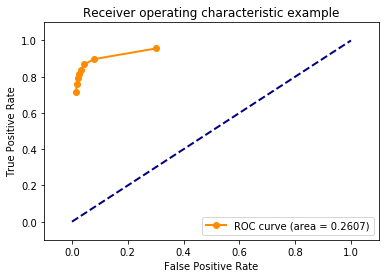

In [25]:
TPRFinal = []
FPRFinal = []
Treshold = [0.5,1,1.5,2,2.5,3,3.5,4]
for i in Treshold:
    y_pred = [1 if x>i else 0 for x in reconstLoss['mse']]
    TPR,FPR = calculate_TPR_FPR(reconstLoss['ActualClass'].values,y_pred,y_pred)
    TPRFinal.append(TPR)
    FPRFinal.append(FPR)

#print TPRFinal
#print FPRFinal

plot_roc(TPRFinal,FPRFinal)

In [26]:
Treshold = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]
for i in Treshold:
    y_pred = [1 if x>i else 0 for x in reconstLoss['mse']]
    print metrics.confusion_matrix(reconstLoss['ActualClass'], y_pred)
    print metrics.classification_report(reconstLoss['ActualClass'], y_pred)


[[59628 25679]
 [    6   130]]
             precision    recall  f1-score   support

          0       1.00      0.70      0.82     85307
          1       0.01      0.96      0.01       136

avg / total       1.00      0.70      0.82     85443

[[78603  6704]
 [   14   122]]
             precision    recall  f1-score   support

          0       1.00      0.92      0.96     85307
          1       0.02      0.90      0.04       136

avg / total       1.00      0.92      0.96     85443

[[81548  3759]
 [   18   118]]
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85307
          1       0.03      0.87      0.06       136

avg / total       1.00      0.96      0.98     85443

[[82585  2722]
 [   22   114]]
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85307
          1       0.04      0.84      0.08       136

avg / total       1.00      0.97      0.98     85443

[[83197  2110]
 